In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import matplotlib.font_manager as fm
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [33]:
df = pd.read_excel("./점수표/섹터별 점수화.xlsx", sheet_name='Sheet1')

df.head()

,시군구명,동명,총 거주자수(주민등록 기준),총생활인구수,미성년자 수,미성년 비율,edu_total,facil_total,income_total,crime_total,lpi_total,total
0,강남구,개포동,50279,52798.00,9271,0.175594,13.83,17.90,14.28,15.18,6.85,68.04
1,강남구,논현동,43136,66419.24,6373,0.095951,14.32,19.44,8.80,17.11,6.85,66.52
2,강남구,대치동,81705,92368.39,23880,0.258530,23.15,19.37,9.28,16.56,6.85,75.21
3,강남구,도곡동,55154,57537.27,13452,0.233796,16.18,19.62,14.28,15.18,6.85,72.11
4,강남구,삼성동,42452,53741.97,8723,0.162313,13.66,19.99,10.43,17.75,6.85,68.68


In [4]:
df.tail()

,시군구명,동명,총 거주자수(주민등록 기준),총생활인구수,미성년자 수,미성년 비율,edu_total,facil_total,income_total,crime_total,lpi_total,total
228,중랑구,면목동,138716,133457.60,17153,0.128528,13.93,19.95,7.67,14.84,3.26,59.65
229,중랑구,묵동,54201,50688.27,6976,0.137626,15.47,20.71,7.99,14.97,3.26,62.40
230,중랑구,상봉동,44073,42867.95,4922,0.114818,14.07,21.19,8.61,14.53,3.26,61.66
231,중랑구,신내동,60451,58664.37,11191,0.190763,14.24,20.49,7.67,14.84,3.26,60.50
232,중랑구,중화동,45069,49401.06,6842,0.138499,14.58,19.88,12.36,14.64,3.26,64.72


In [4]:
df.columns

Index(['시군구명', '동명', '총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'edu_total', 'facil_total', 'income_total', 'crime_total', 'lpi_total',
       'total'],
      dtype='object')

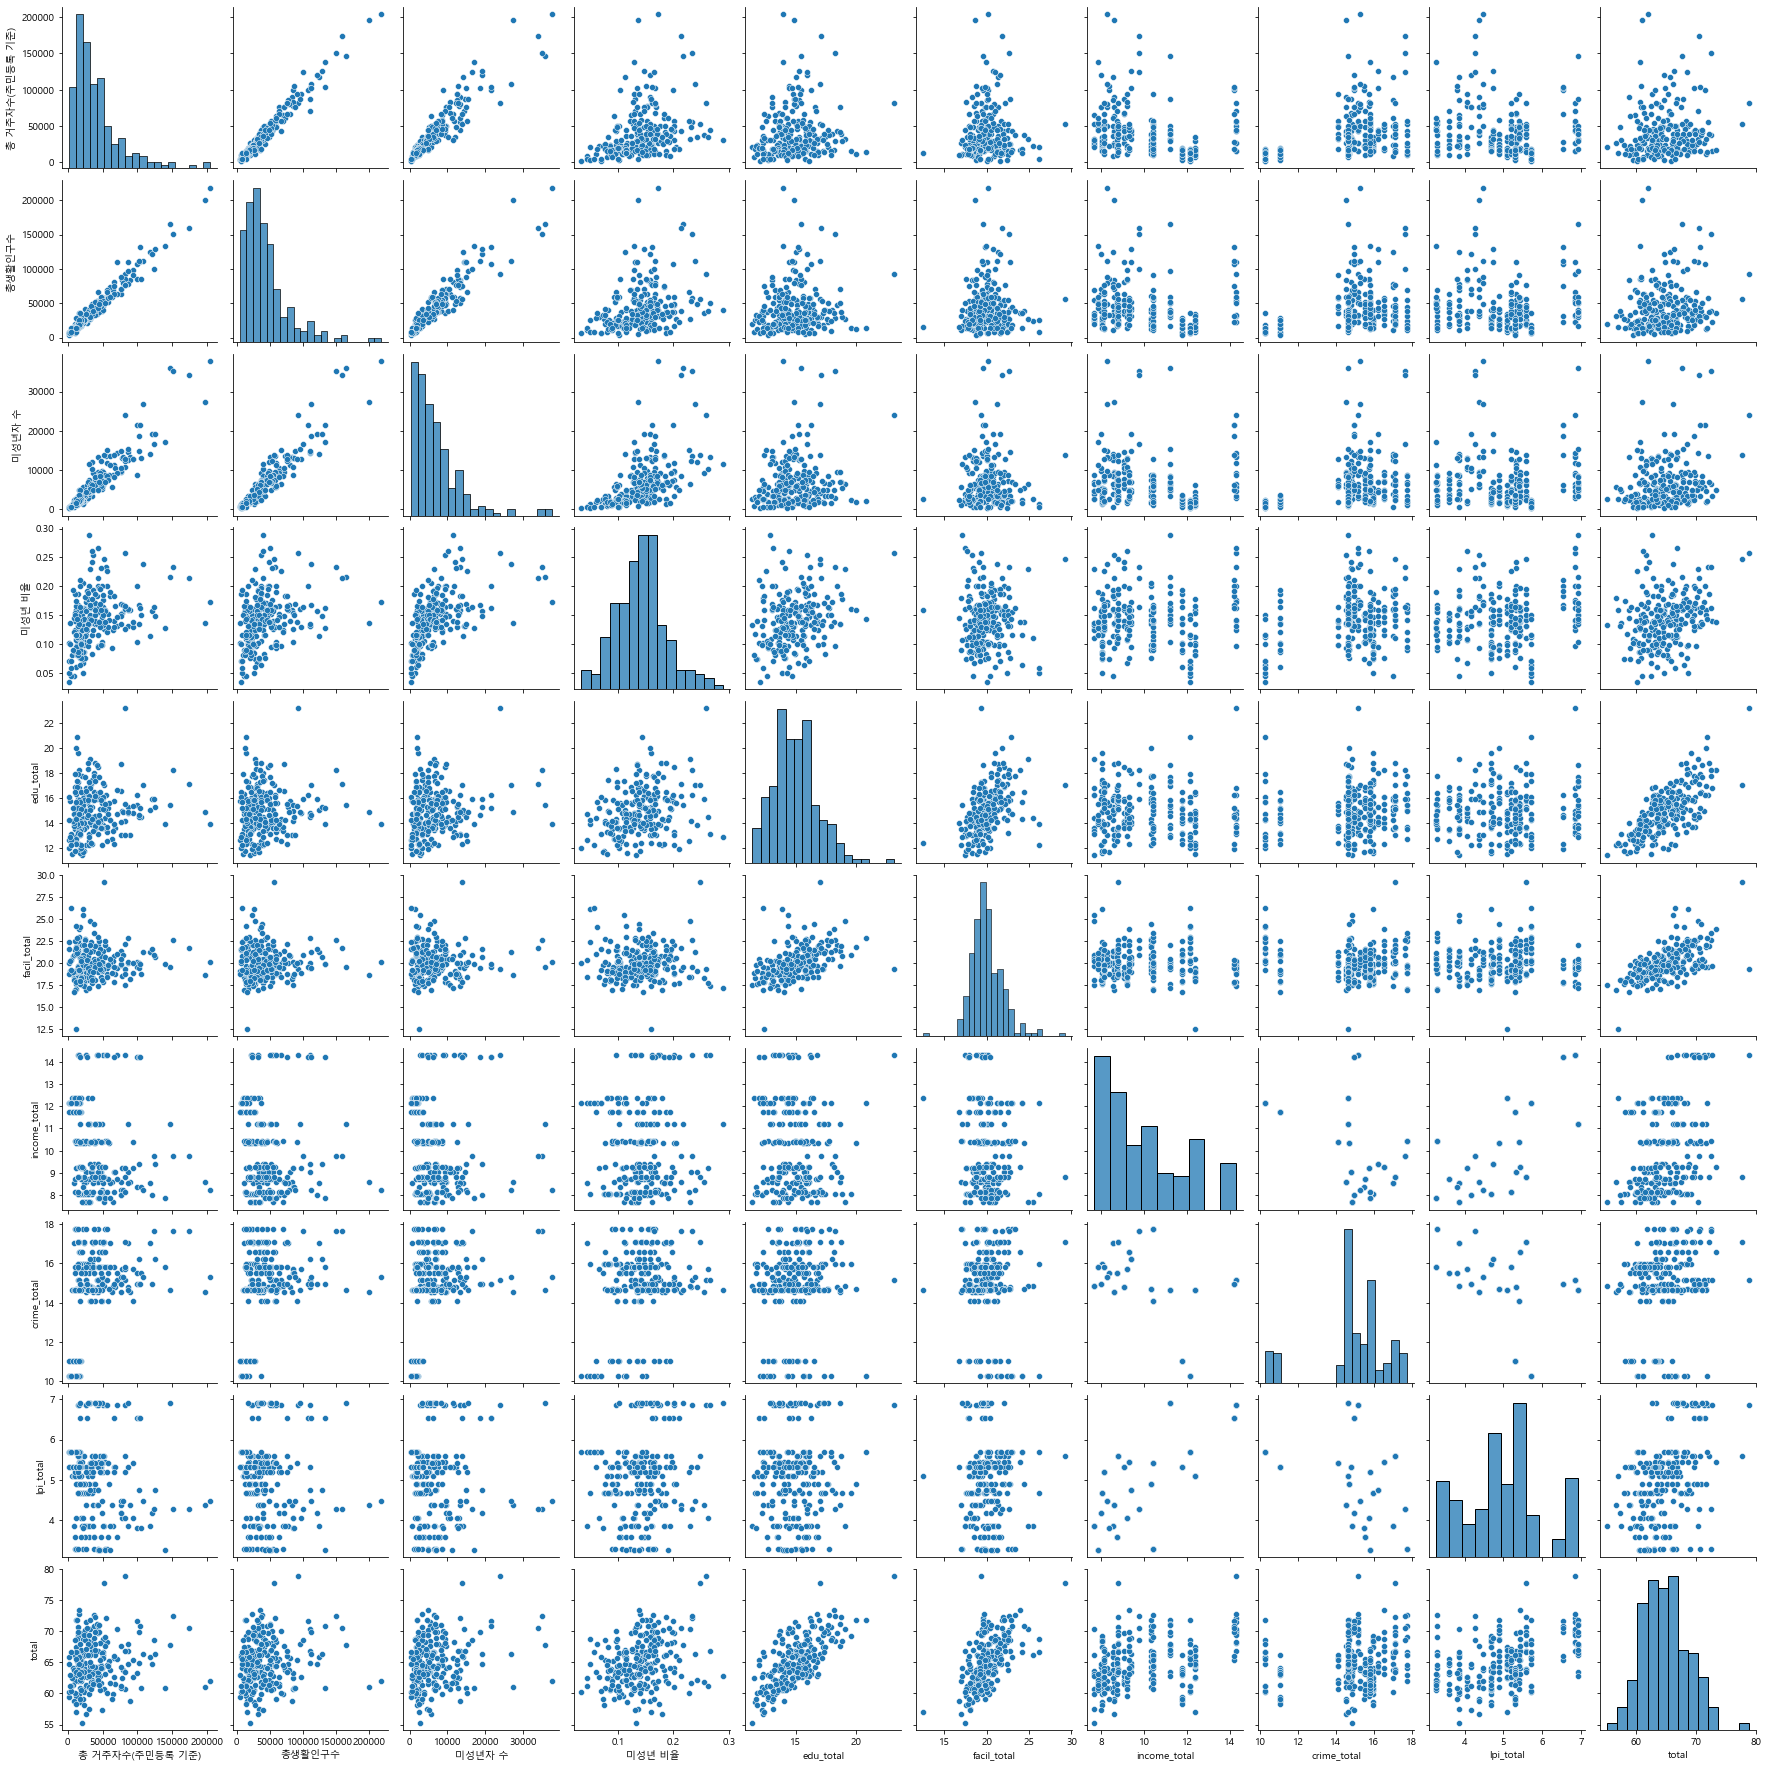

In [6]:
sns.pairplot(df[['총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'edu_total', 'facil_total', 'income_total', 'crime_total', 'lpi_total',
       'total']])

plt.show()

In [8]:
cols = ['총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'edu_total', 'facil_total', 'income_total', 'crime_total', 'lpi_total',
       'total']

corr = df[cols].corr(method='pearson')

In [9]:
corr

,총 거주자수(주민등록 기준),총생활인구수,미성년자 수,미성년 비율,edu_total,facil_total,income_total,crime_total,lpi_total,total
총 거주자수(주민등록 기준),1.000000,0.978695,0.927266,0.343328,0.108551,0.056908,-0.176156,0.297384,-0.098797,0.107394
총생활인구수,0.978695,1.000000,0.938555,0.315241,0.084554,0.052947,-0.107016,0.271033,-0.029436,0.133742
미성년자 수,0.927266,0.938555,1.000000,0.545824,0.158027,0.053459,-0.043761,0.265225,0.043343,0.216388
미성년 비율,0.343328,0.315241,0.545824,1.000000,0.271951,-0.025312,0.032138,0.226647,0.158082,0.281991
edu_total,0.108551,0.084554,0.158027,0.271951,1.000000,0.453820,-0.056726,0.087267,0.034033,0.715461
facil_total,0.056908,0.052947,0.053459,-0.025312,0.453820,1.000000,-0.093122,-0.087640,-0.019631,0.601416
income_total,-0.176156,-0.107016,-0.043761,0.032138,-0.056726,-0.093122,1.000000,-0.459944,0.655259,0.374457
crime_total,0.297384,0.271033,0.265225,0.226647,0.087267,-0.087640,-0.459944,1.000000,-0.340628,0.158722
lpi_total,-0.098797,-0.029436,0.043343,0.158082,0.034033,-0.019631,0.655259,-0.340628,1.000000,0.428657
total,0.107394,0.133742,0.216388,0.281991,0.715461,0.601416,0.374457,0.158722,0.428657,1.000000


<AxesSubplot:>

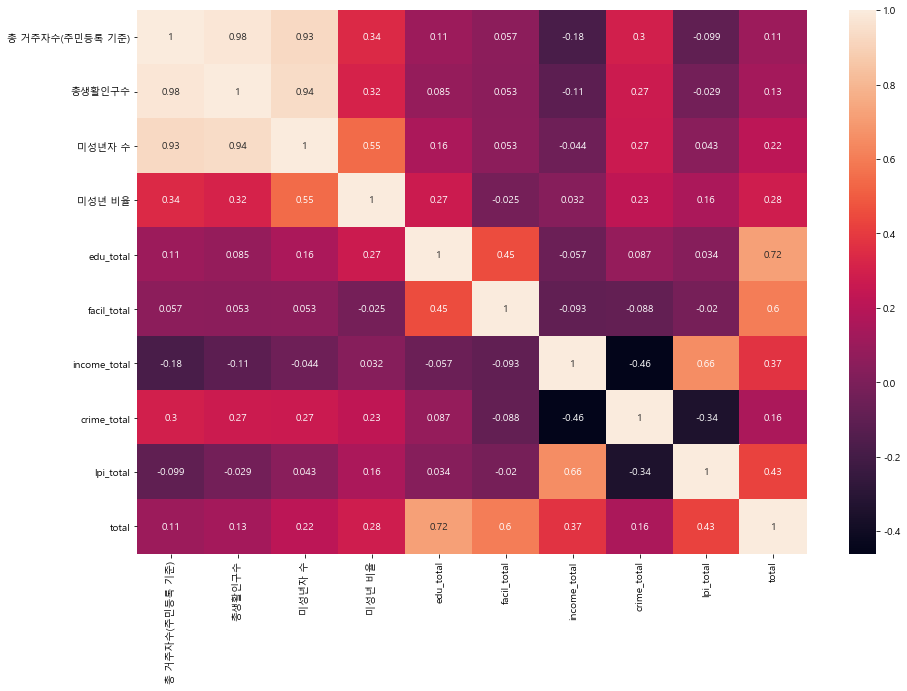

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='미성년 비율', ylabel='total'>

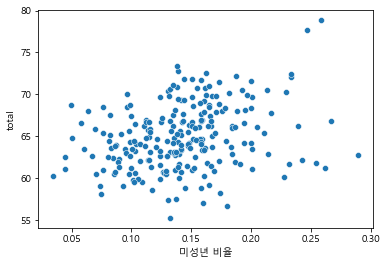

In [11]:
sns.scatterplot(data=df, x='미성년 비율', y='total')

In [34]:
# k-means 1
# X            	Y
#미성년비율	   edu_total
from sklearn.cluster import KMeans

X1 = df[['미성년 비율' , 'total']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [35]:
inertia

[3180.655154272232,
 1145.3025146592015,
 606.2349707104606,
 371.76239433673453,
 275.18265693858774,
 188.6707538450318,
 144.32293062759808,
 110.10137165637894,
 89.54839400258498,
 71.90509947308863]

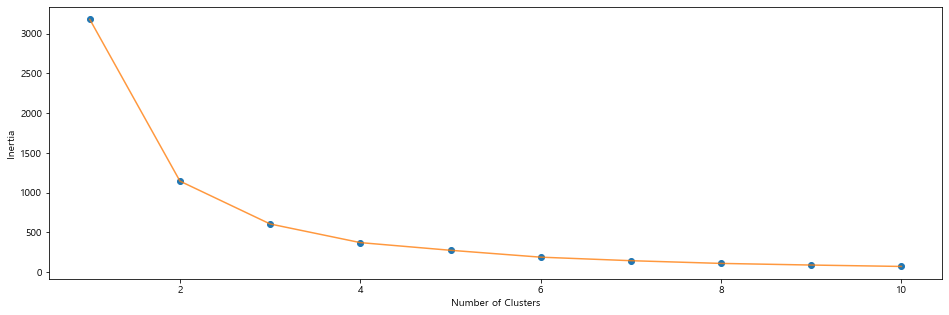

In [36]:
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11) ,inertia, '-', alpha = 0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4).fit(df[['미성년 비율', 'total']].values)

In [38]:
print(kmeans.cluster_centers_)

[[ 0.13631499 60.36561404]
 [ 0.14599364 67.46507042]
 [ 0.15543444 71.71083333]
 [ 0.13929108 64.05407407]]


In [47]:
print(kmeans.labels_)

[3 3 0 3 3 2 3 0 3 3 3 3 1 2 2 2 3 2 2 1 3 3 1 3 2 2 2 1 1 1 1 1 3 2 1 2 2
 2 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1
 2 1 2 2 2 3 2 1 1 2 2 2 1 1 2 2 2 1 2 1 2 3 2 2 2 2 3 3 3 2 1 2 3 2 3 3 2
 0 3 1 3 3 0 2 2 2 2 2 3 3 0 3 0 3 0 3 2 2 1 1 2 3 1 2 3 0 0 3 3 3 2 2 2 3
 2 1 3 3 0 3 3 0 3 3 0 3 2 2 3 3 3 3 3 3 2 2 1 2 2 1 1 2 1 2 1 3 2 3 2 2 3
 2 1 2 2 2 2 1 3 2 1 2 2 3 2 1 2 3 2 1 2 1 2 2 2 2 1 1 2 1 2 3 1 2 2 2 1 1
 2 3 1 2 2 1 1 1 1 1 1]


In [48]:
df['cluster'] = kmeans.labels_
print(df)

    시군구명   동명  총 거주자수(주민등록 기준)     총생활인구수  미성년자 수    미성년 비율  edu_total  \
0    강남구  개포동            50279   52798.00    9271  0.175594      13.83   
1    강남구  논현동            43136   66419.24    6373  0.095951      14.32   
2    강남구  대치동            81705   92368.39   23880  0.258530      23.15   
3    강남구  도곡동            55154   57537.27   13452  0.233796      16.18   
4    강남구  삼성동            42452   53741.97    8723  0.162313      13.66   
..   ...  ...              ...        ...     ...       ...        ...   
228  중랑구  면목동           138716  133457.60   17153  0.128528      13.93   
229  중랑구   묵동            54201   50688.27    6976  0.137626      15.47   
230  중랑구  상봉동            44073   42867.95    4922  0.114818      14.07   
231  중랑구  신내동            60451   58664.37   11191  0.190763      14.24   
232  중랑구  중화동            45069   49401.06    6842  0.138499      14.58   

     facil_total  income_total  crime_total  total  cluster  
0          17.90         21.13        14.69  67.5

C:\Users\tjoeun-jg-303\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


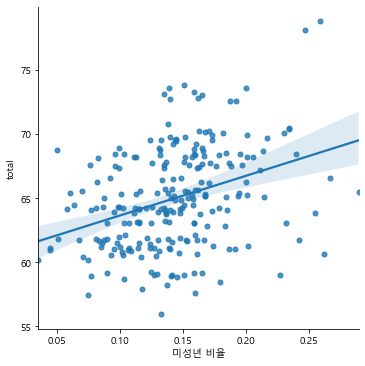

In [50]:
sns.lmplot('미성년 비율', 'total', data=df, fit_reg=True, scatter_kws={'s':25}) # 점의 크기 : 25
plt.xlabel('미성년 비율')
plt.ylabel('total')
plt.show()

In [39]:
# k-means 다른방법
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_kmeans = df[['미성년 비율', 'total']]
df_kmeans

sc_X = MinMaxScaler()
data2 = sc_X.fit_transform(df_kmeans)

In [40]:
data2

array([[0.55350794, 0.60796646],
       [0.24060407, 0.5442348 ],
       [0.87935175, 0.90859539],
       [0.78217675, 0.77861635],
       [0.50132832, 0.63480084],
       [0.91049424, 0.47002096],
       [0.35044523, 0.52872117],
       [0.41039469, 0.80587002],
       [0.54337676, 0.45618449],
       [0.37612236, 0.55681342],
       [0.65052254, 0.43480084],
       [0.41971808, 0.6524109 ],
       [0.81517491, 0.59622642],
       [0.77426652, 0.42767296],
       [0.41160268, 0.47421384],
       [0.48783914, 0.46289308],
       [0.65311523, 0.85953878],
       [0.50366291, 0.56981132],
       [0.41486943, 0.59454927],
       [0.51712848, 0.55555556],
       [0.3814372 , 0.70398323],
       [0.29882598, 0.82389937],
       [0.36048475, 0.29979036],
       [0.76572847, 0.80922432],
       [0.49881647, 0.71236897],
       [0.38347901, 0.69266247],
       [0.39969124, 0.52578616],
       [0.35162705, 0.40796646],
       [0.38326501, 0.21383648],
       [0.40199268, 0.44654088],
       [0.

In [41]:
km = KMeans(n_clusters=5, algorithm='auto', init='k-means++', n_init=10, max_iter=300)

In [42]:
km.fit(data2)
predict = pd.DataFrame(km.predict(data2))

In [43]:
centers = pd.DataFrame(km.cluster_centers_, columns=['미성년 비율', 'total'])
centers2 = sc_X.inverse_transform(centers)

In [10]:
centers2

array([[ 0.15959758, 62.90890411],
       [ 0.15292537, 68.50140351],
       [ 0.09110154, 67.1183871 ],
       [ 0.22971257, 67.81666667],
       [ 0.10064756, 61.54019608]])

In [11]:
df_kmeans

,미성년 비율,total
0,0.175594,68.04
1,0.095951,66.52
2,0.258530,75.21
3,0.233796,72.11
4,0.162313,68.68
...,...,...
228,0.128528,59.65
229,0.137626,62.40
230,0.114818,61.66
231,0.190763,60.50


In [12]:
predict

,0
0,1
1,2
2,3
3,3
4,1
...,...
228,4
229,0
230,4
231,0


In [44]:
df_kmeans = df_kmeans.reset_index()

In [45]:
predict = predict.reset_index()

In [46]:
data3 = pd.merge(predict, df_kmeans)

In [47]:
data3

,index,0,미성년 비율,total
0,0,0,0.175594,68.04
1,1,1,0.095951,66.52
2,2,4,0.258530,75.21
3,3,4,0.233796,72.11
4,4,0,0.162313,68.68
...,...,...,...,...
228,228,3,0.128528,59.65
229,229,2,0.137626,62.40
230,230,3,0.114818,61.66
231,231,2,0.190763,60.50


In [48]:
data3.columns=['index', 'cluster', '미성년 비율', 'total']

Text(0, 0.5, 'total')

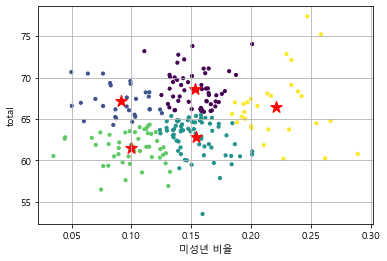

In [50]:
plt.grid()
plt.scatter(data3['미성년 비율'], data3.total, c=data3.cluster, s=10)
plt.scatter(centers2[:,0], centers2[:,1], s=150, marker='*', color='red')
plt.xlabel('미성년 비율')
plt.ylabel('total')

In [57]:
print(df['미성년 비율'].mean(), df['total'].mean())

0.14226826986270125 64.9798283261803


In [20]:
print(df['미성년 비율'].mean(), df['total'].mean())

0.14226826986270125 64.97982832618027


In [21]:
df_criteria1 = df[df['미성년 비율'] >= 0.2]
df_criteria1

,시군구명,동명,총 거주자수(주민등록 기준),총생활인구수,미성년자 수,미성년 비율,edu_total,facil_total,income_total,crime_total,lpi_total,total
2,강남구,대치동,81705,92368.39,23880,0.258530,23.15,19.37,14.28,15.18,6.85,78.83
3,강남구,도곡동,55154,57537.27,13452,0.233796,16.18,19.62,14.28,15.18,6.85,72.11
5,강남구,세곡동,44018,50199.54,13376,0.266457,13.11,17.41,14.28,15.18,6.85,66.83
10,강남구,일원동,56603,58835.67,11784,0.200287,13.27,18.75,14.28,15.18,6.85,68.33
12,강동구,강일동,35420,49307.33,11942,0.242195,13.83,19.15,9.06,14.80,5.32,62.16
13,강동구,고덕동,47899,52695.86,12214,0.231783,14.12,18.44,9.06,14.80,5.32,61.74
16,강동구,명일동,43282,46853.25,9415,0.200947,18.45,22.09,9.06,14.80,5.32,69.72
23,강북구,삼각산동,31585,27646.91,6348,0.229610,19.09,24.86,7.67,14.84,3.85,70.31
33,강서구,발산동,37083,36520.00,9300,0.254655,15.92,18.35,8.61,14.53,4.36,61.77
36,강서구,우장산동,43235,39269.07,8420,0.214418,16.12,19.25,8.61,14.53,4.36,62.87


In [22]:
df_criteria2 = df[df['total'] <= 64.97982832618027]
df_criteria2

,시군구명,동명,총 거주자수(주민등록 기준),총생활인구수,미성년자 수,미성년 비율,edu_total,facil_total,income_total,crime_total,lpi_total,total
12,강동구,강일동,35420,49307.33,11942,0.242195,13.83,19.15,9.06,14.80,5.32,62.16
13,강동구,고덕동,47899,52695.86,12214,0.231783,14.12,18.44,9.06,14.80,5.32,61.74
14,강동구,길동,45937,54282.14,7571,0.139475,14.06,19.61,9.06,14.80,5.32,62.85
15,강동구,둔촌동,26010,34025.84,5406,0.158879,15.86,18.36,9.06,14.80,5.32,63.40
17,강동구,상일동,32896,39114.38,6372,0.162907,13.93,18.70,9.06,14.80,5.32,61.81
...,...,...,...,...,...,...,...,...,...,...,...,...
228,중랑구,면목동,138716,133457.60,17153,0.128528,13.93,19.95,7.85,15.81,3.26,60.80
229,중랑구,묵동,54201,50688.27,6976,0.137626,15.47,20.71,7.85,15.81,3.26,63.10
230,중랑구,상봉동,44073,42867.95,4922,0.114818,14.07,21.19,7.85,15.81,3.26,62.18
231,중랑구,신내동,60451,58664.37,11191,0.190763,14.24,20.49,7.85,15.81,3.26,61.65


In [23]:
df.columns

Index(['시군구명', '동명', '총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'edu_total', 'facil_total', 'income_total', 'crime_total', 'lpi_total',
       'total'],
      dtype='object')

In [24]:
df_cluster = pd.merge(df_criteria1, df_criteria2, how='inner', on=['시군구명', '동명', '총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'edu_total', 'facil_total', 'income_total', 'crime_total', 'lpi_total','total'])

In [25]:
df_cluster[['시군구명', '동명', '미성년 비율', 'total']]

,시군구명,동명,미성년 비율,total
0,강동구,강일동,0.242195,62.16
1,강동구,고덕동,0.231783,61.74
2,강서구,발산동,0.254655,61.77
3,강서구,우장산동,0.214418,62.87
4,광진구,광장동,0.261915,61.17
5,노원구,하계동,0.200171,64.16
6,마포구,상암동,0.201062,61.09
7,송파구,오륜동,0.200867,63.45
8,송파구,위례동,0.289238,62.78
9,은평구,진관동,0.227153,60.14
